<a href="https://colab.research.google.com/github/Shan-JCB/Currency_Convert/blob/master/Predicci%C3%B3n_PMV1_TALLER_PROYECTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import files

In [2]:
# Subir el archivo Excel
uploaded = files.upload()
# Leer el archivo Excel cargado (asegurándote de que el archivo cargado se llama correctamente)
# Reemplaza 'nombre_del_archivo.xlsx' con el nombre del archivo cargado
file_name = next(iter(uploaded))
df = pd.read_excel(file_name)

Saving destinos_turisticos_accesibles v3.xlsx to destinos_turisticos_accesibles v3.xlsx


In [3]:
# Mostrar las primeras filas para verificar que los datos se cargaron correctamente
print(df.head())

                     Destino  Visitas  Servicios_Accesibles   Año  \
0                Huarihuilca     1500                     5  2020   
1        Cerrito La Libertad     1200                     3  2021   
2                 Huarivilca     1800                     6  2020   
3  Iglesia Santo Cura de Ars     1100                     2  2021   
4                Huarihuilca     1600                     6  2022   

  Accesibilidad  
0          Alta  
1         Media  
2          Alta  
3          Alta  
4          Alta  


In [4]:
# Variables predictoras
X = df[['Visitas', 'Servicios_Accesibles', 'Año']]
# Variable objetivo
Y = df['Accesibilidad']

In [5]:
# División de datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.6, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Realizar la predicción en el conjunto de prueba
y_pred = model.predict(x_test)

In [6]:
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", round(precision * 100, 2), "%")

Precisión del modelo: 96.88 %


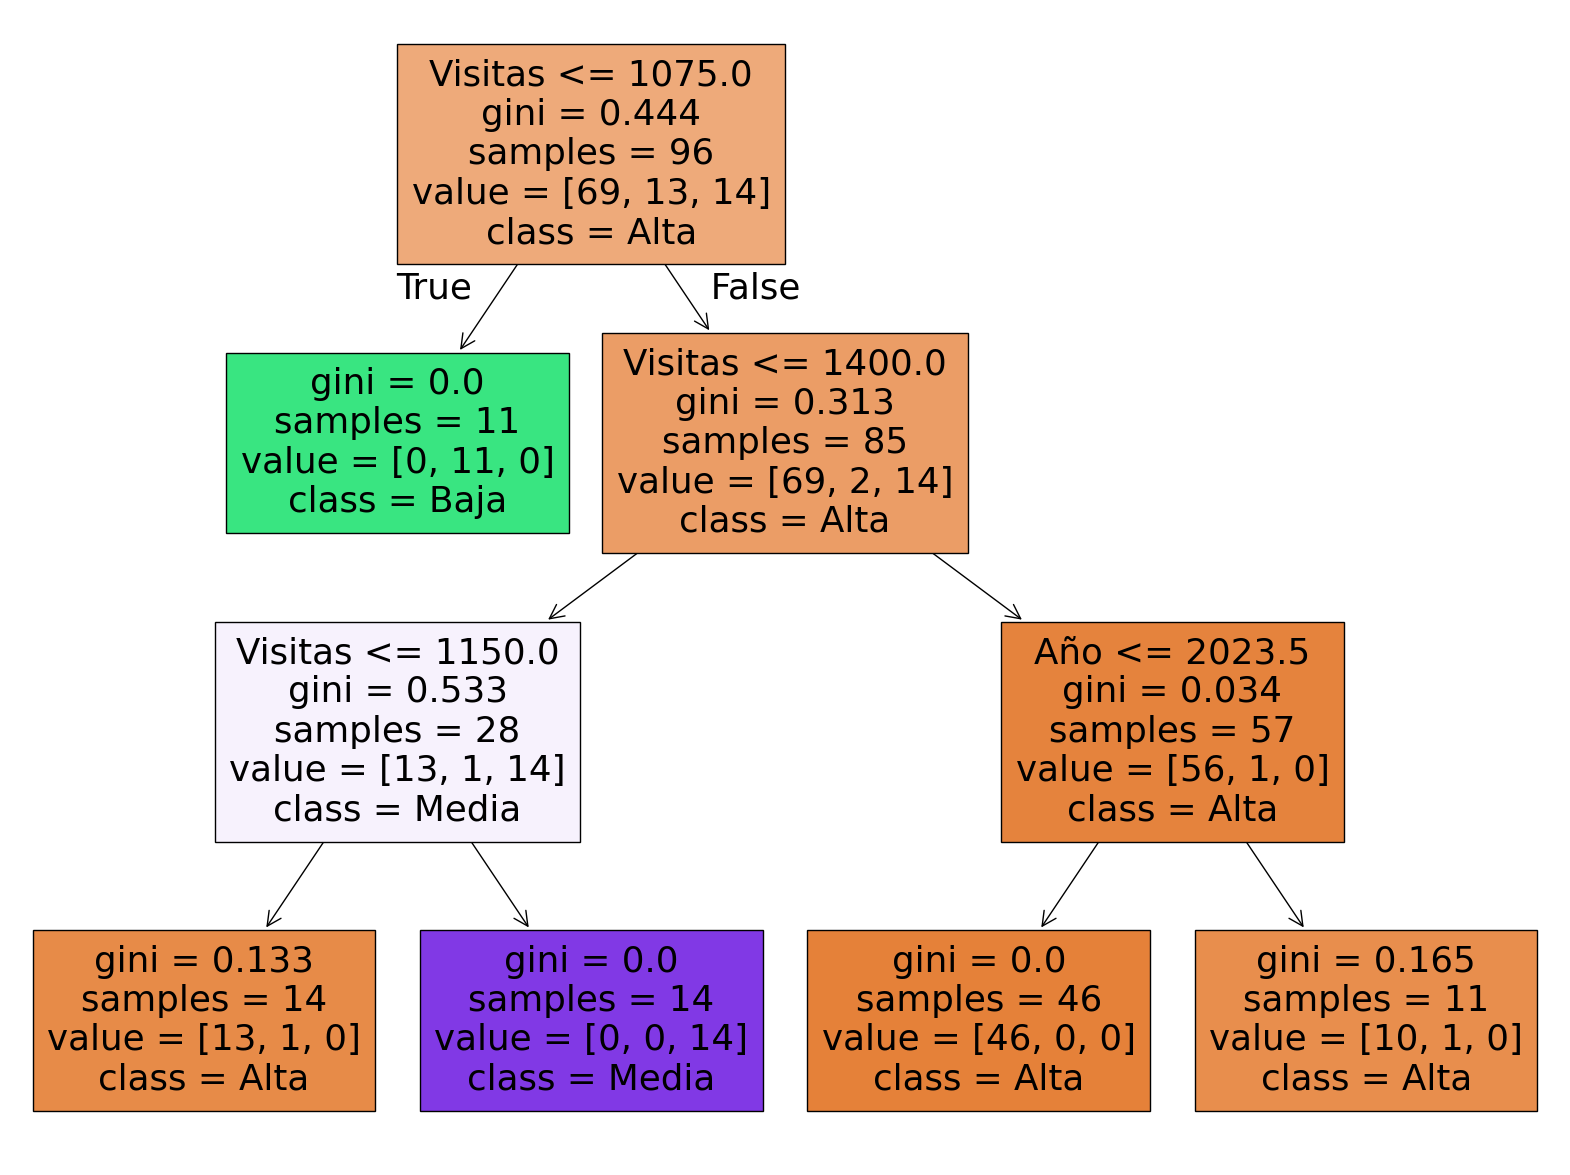

In [7]:
# Visualización del árbol de decisión
f = plt.figure(figsize=(20, 15))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

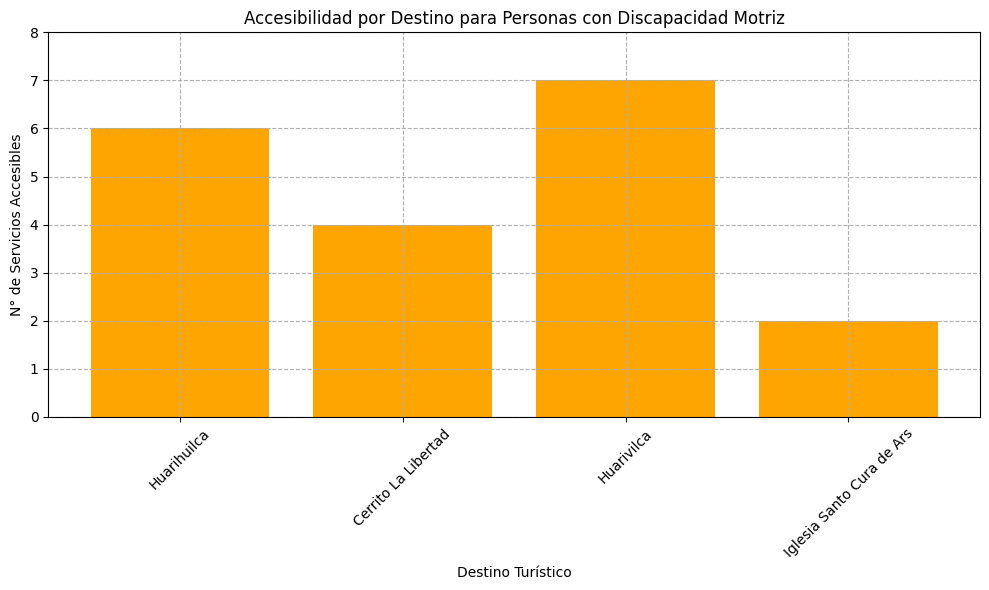

In [8]:
# Gráfico de servicios accesibles por destino
plt.figure(figsize=(10, 6))
plt.bar(df['Destino'], df['Servicios_Accesibles'], color='orange')
plt.xticks(rotation=45)
plt.xlabel('Destino Turístico')
plt.ylabel('N° de Servicios Accesibles')
plt.title('Accesibilidad por Destino para Personas con Discapacidad Motriz')
plt.ylim([0, max(df['Servicios_Accesibles']) + 1])
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()